2.0 -2.0
1.5555555555555554 2.0
1.5555555555555554 -0.22222222222222232
1.1111111111111107 -0.22222222222222232
1.1111111111111107 -0.22222222222222232
1.1111111111111107 -0.22222222222222232
1.1111111111111107 0.22222222222222232
1.1111111111111107 0.6666666666666665


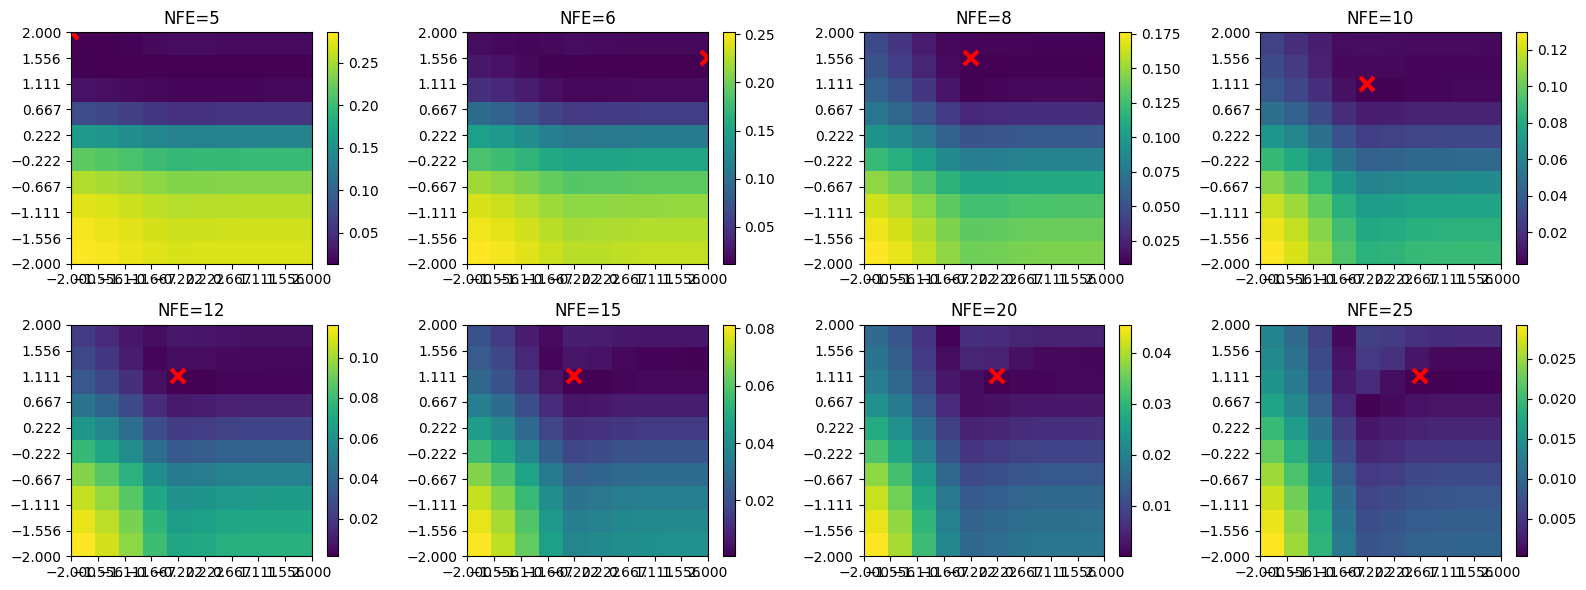

In [30]:
import numpy as np
import matplotlib.pyplot as plt

NFEs = [5, 6, 8, 10, 12, 15, 20, 25]

# 한 row에 4개씩 놓기 위해 행/열 계산
ncol = 4
nrow = (len(NFEs) + ncol - 1) // ncol  # 필요한 행의 수
fig, axes = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow))

# -2부터 2까지 10개 구간
ticks = np.linspace(-2, 2, 10)

# axes를 2차원 배열이 아닌 1차원처럼 순회하기 위해 flatten()
axes = axes.flatten()

def idx_to_coord(idx):
    # idx: 0 ~ 9
    # -2 ~ 2 구간을 10등분 => (idx / 9) * 4 - 2
    return (idx / 9) * 4 - 2

for i, NFE in enumerate(NFEs):
    ax = axes[i]
    
    # 데이터 로드
    npz_file = f'/data/score_sde_scale_rbf_const_grid/NFE={NFE},p=3.npz'
    data = np.load(npz_file)
    loss_grid = data['loss_grid']
    print(data['optimal_log_scale_p'], data['optimal_log_scale_c'])
    
    # 히트맵 표시 (extent로 좌우, 상하 범위 지정)
    im = ax.imshow(
        loss_grid, 
        origin='lower', 
        aspect='auto', 
        extent=[-2, 2, -2, 2]
    )
    
    # 최소값 위치 찾기
    min_idx = np.unravel_index(np.argmin(loss_grid), loss_grid.shape)
    
    # 빨간 X 표시 (인덱스를 좌표로 변환 후 표시)
    x_coord = idx_to_coord(min_idx[1])
    y_coord = idx_to_coord(min_idx[0])
    ax.plot(x_coord, y_coord, 'x', markersize=10, markeredgewidth=3, color='red')
    
    ax.set_title(f"NFE={NFE}")
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    # colorbar
    fig.colorbar(im, ax=ax)

# 남은 빈 subplot이 있다면 숨기기
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()
